# Etape_2 : Préparez la veille technique en NLP ou en computer vision :

## 2.1 - Mise en place d'une veille technique :

Pour ce projet je choisi de reprendre le dataset de classification d'images du **Projet 6**.  
Il s'agit d'un dataset de 1050 images à classifier en 7 catégories :   
* Home Furnishing
* Baby Care
* Watches
* Home Decor & Festive Needs
* Kitchen & Dining
* Beauty and Personal Care
* Computers 

---
Recherche d'une méthode/modèle récent(e) afin d'améliorer la classification de Computer Vision.  
Projet intéressant : `ProtoViT`  

[https://arxiv.org/abs/2410.20722](https://arxiv.org/abs/2410.20722)  
[https://github.com/Henrymachiyu/ProtoViT](https://github.com/Henrymachiyu/ProtoViT)

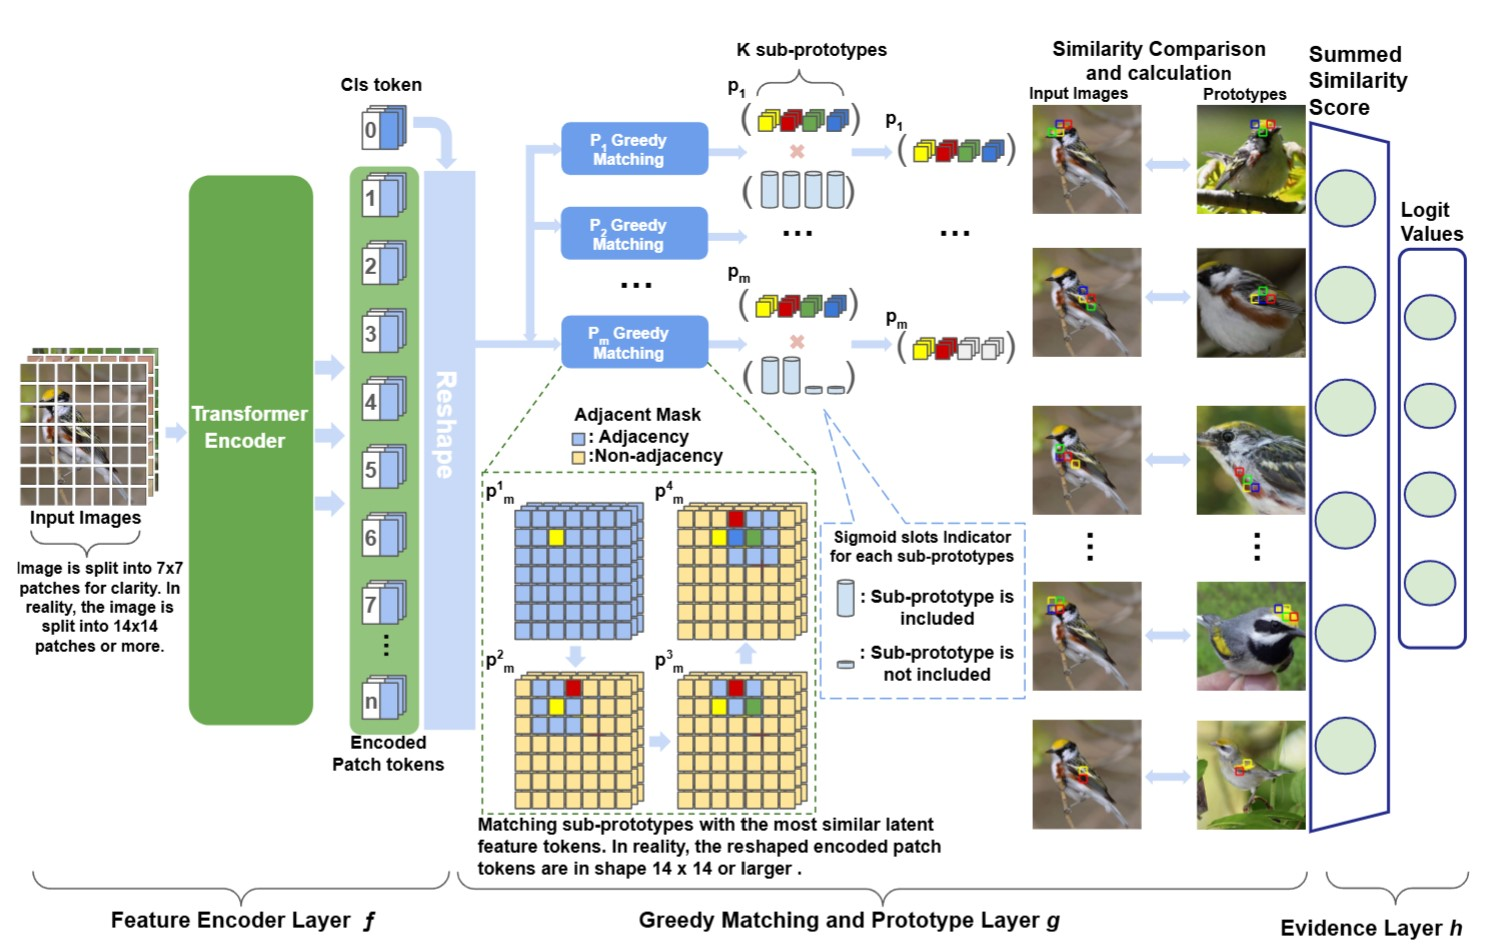

#### Requirements utilisés pour ce projet : 

* env dédié : `conda activate ProtoViT`
* GPU configuration : 1 x NVIDIA RTX 3090 (24GB) avec CUDA: 12.7

[https://huggingface.co/chiyum609/ProtoViT](https://huggingface.co/chiyum609/ProtoViT)  

[https://github.com/facebookresearch/deit/blob/main/README_deit.md](https://github.com/facebookresearch/deit/blob/main/README_deit.md)

Liens intéressants :

Choisi un modèle pré-entrainé :
[https://www.innovatiana.com/post/discover-resnet-50](https://www.innovatiana.com/post/discover-resnet-50)

1. DeiT (Data-efficient Image Transformer)
Pourquoi ?
C'est une variante de Vision Transformers optimisée pour fonctionner avec moins de données que les ViT classiques, grâce à des mécanismes comme le distillation token.
Pré-entraîné sur ImageNet.
Avantages :
Moins gourmand en données.
Bonne généralisation pour des tâches comme la classification d'objets divers.
Recommandation :
DeiT-Small pour un bon compromis entre performances et légèreté.